In [1]:
#Importando as bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Lendo o arquivo 
df = pd.read_csv('./healthcare.csv')

In [3]:
#Conferindo as linhas 
print(len(df))

5110


In [4]:
#Conferindo as colunas
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
#Renomeando as colunas
df.rename(columns={
    'id': 'id',
    'gender': 'genero',
    'age': 'idade',
    'hypertension': 'hipertensao',
    'heart_disease': 'doenca_cardiaca',
    'ever_married': 'casado',
    'work_type': 'tipo_de_trabalho',
    'Residence_type': 'tipo_de_residencia',
    'avg_glucose_level': 'glicemia_media',
    'bmi': 'imc',
    'smoking_status': 'fumante',
    'stroke': 'avc_derrame'
}, inplace=True)

In [6]:
#conferindo os valores nulos
print(df.isnull().sum())

id                      0
genero                  0
idade                   0
hipertensao             0
doenca_cardiaca         0
casado                  0
tipo_de_trabalho        0
tipo_de_residencia      0
glicemia_media          0
imc                   201
fumante                 0
avc_derrame             0
dtype: int64


In [7]:
#Conferindo os duplicados 
print(df.duplicated().sum()) 

0


In [8]:
#Verificando os valores unicos na coluna fumante 
print(df['fumante'].unique()) 

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [9]:
#Excluindo os valores 'Unknown'
df = df[df['fumante'] != 'Unknown']

# Converter a coluna 'fumante' de strings para inteiros (0 e 1)
df['fumante'] = df['fumante'].replace({'formerly smoked': 1, 'never smoked':0, 'smokes':1}).astype(int)


C:\Users\Fernanda\AppData\Local\Temp\ipykernel_8148\3439579299.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fumante'] = df['fumante'].replace({'formerly smoked': 1, 'never smoked':0, 'smokes':1}).astype(int)


In [10]:
#total de pessoas na coluna fumantes 
total_pessoas = df['fumante'].count()

#total de fumantes
total_fumantes = (df['fumante']== 1).sum()

#total de não fumantes
total_nao_fumantes = (df['fumante'] == 0).sum()

# Calcular a porcentagem de fumantes e não fumantes
fumantes = (total_fumantes / total_pessoas) * 100
nao_fumantes = (total_nao_fumantes / total_pessoas) * 100

# Imprimir os resultados
print(f"Número total de fumantes: {total_fumantes} ({fumantes:.2f}%)")
print(f"Número total de não fumantes: {total_nao_fumantes} ({nao_fumantes:.2f}%)")

# Comparar os valores
if fumantes > nao_fumantes:
    print("A porcentagem de fumantes é maior do que a de não fumantes.")
elif fumantes < nao_fumantes:
    print("A porcentagem de não fumantes é maior do que a de fumantes.")
else:
    print("A porcentagem de fumantes e não fumantes é igual.")


Número total de fumantes: 1674 (46.94%)
Número total de não fumantes: 1892 (53.06%)
A porcentagem de não fumantes é maior do que a de fumantes.


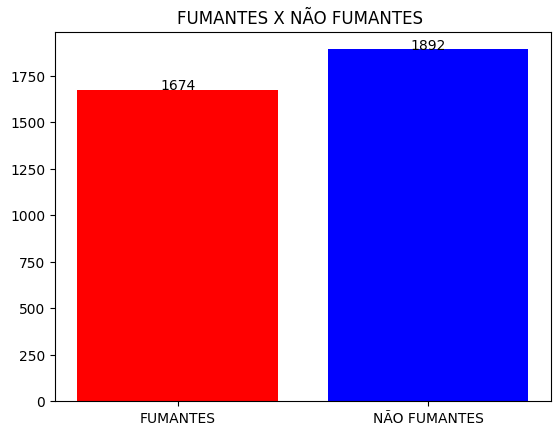

In [11]:
total_fumantes = df[df['fumante'] == 1]

total_nao_fumantes = df[df['fumante'] == 0]

# Criar o gráfico de barras
labels = ['FUMANTES', 'NÃO FUMANTES']
values = [len(total_fumantes), len(total_nao_fumantes)]

plt.bar(labels, values, color=['red','blue'])

# Adicionar rótulos de quantidade nas barras
for i, value in enumerate(values):
    plt.text(i, value + 0.5, str(value), ha='center')
plt.title('FUMANTES X NÃO FUMANTES ')

plt.show()


Número de homens fumantes: 744
Número de mulheres fumantes: 929


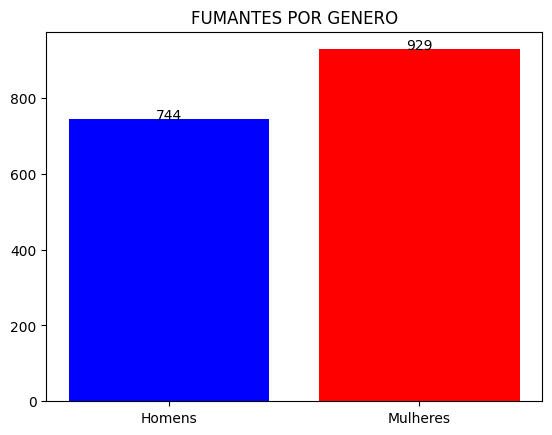

In [12]:
import matplotlib.pyplot as plt

# Filtrar o DataFrame para incluir apenas os fumantes
total_fumantes = df[df['fumante'] == 1]

# Contar o número de homens fumantes
homens_fumantes = total_fumantes[total_fumantes['genero'] == 'Male']
print("Número de homens fumantes:", len(homens_fumantes))

# Contar o número de mulheres fumantes
mulheres_fumantes = total_fumantes[total_fumantes['genero'] == 'Female']
print("Número de mulheres fumantes:", len(mulheres_fumantes))

# Criar o gráfico de barras
labels = ['Homens', 'Mulheres']
values = [len(homens_fumantes), len(mulheres_fumantes)]

plt.bar(labels, values, color=['blue', 'red'])

# Adicionar rótulos de quantidade nas barras
for i, value in enumerate(values):
    plt.text(i, value + 0.5, str(value), ha='center')

plt.title('FUMANTES POR GENERO')
plt.show()


In [13]:
# Filtrar o DataFrame para incluir apenas pessoas que tiveram AVC
geral_com_avc = df[df['avc_derrame'] == 1]
print(len(geral_com_avc))

# Filtrar o DataFrame para incluir apenas pessoas que fumam
geral_fumamntes = geral_com_avc[geral_com_avc['fumante'] == 1]


# Filtrar fumantes com AVC
fumantes_com_avc = geral_fumamntes[geral_fumamntes['avc_derrame'] == 1]
print(len(fumantes_com_avc))

# geral avc menos os fuamantes avc
nao_fumantes_com_avc = len(geral_com_avc) - len(fumantes_com_avc)
print(nao_fumantes_com_avc)


202
112
90


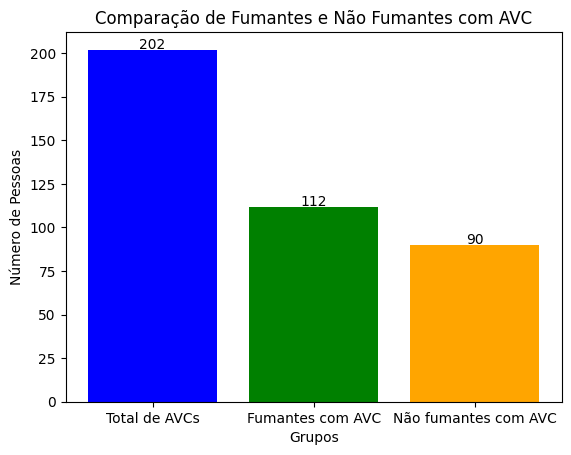

In [14]:
# Dados para o gráfico, incluindo o total de AVCs
# Organizar os dados na ordem desejada (esquerda para direita)
labels = [ 'Total de AVCs','Fumantes com AVC', 'Não fumantes com AVC']
values = [ len(geral_com_avc),len(fumantes_com_avc), nao_fumantes_com_avc]

# Criar o gráfico de colunas
plt.bar(labels, values, color=['blue', 'green', 'orange'])

# Adicionar rótulos acima das barras
for i, value in enumerate(values):
    plt.text(i, value + 0.5, str(value), ha='center')

# Adicionar títulos e rótulos
plt.title('Comparação de Fumantes e Não Fumantes com AVC')
plt.ylabel('Número de Pessoas')
plt.xlabel('Grupos')


# Exibir o gráfico
plt.show()


Número de homens fumantes: 744
Número de mulheres fumantes: 929


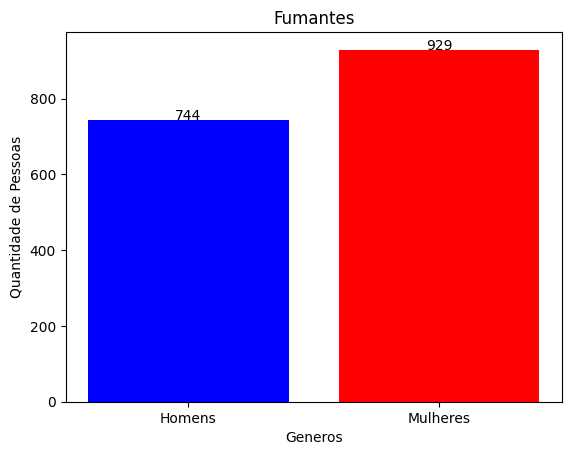

In [15]:
# Filtrar o DataFrame para incluir apenas os fumantes
total_fumantes = df[df['fumante'] == 1]

# Contar o número de homens fumantes
homens_fumantes = total_fumantes[total_fumantes['genero'] == 'Male']
print("Número de homens fumantes:", len(homens_fumantes))

# Contar o número de mulheres fumantes
mulheres_fumantes = total_fumantes[total_fumantes['genero'] == 'Female']
print("Número de mulheres fumantes:", len(mulheres_fumantes))

#grafico de barras
labels = ['Homens', 'Mulheres']
values = [len(homens_fumantes),len(mulheres_fumantes)]

plt.bar(labels, values, color=['blue', 'red'])

#rotulos 
for i, value in enumerate(values):
    plt.text(i, value + 0.5, str(value), ha='center')

plt.title('Fumantes')

plt.ylabel('Quantidade de Pessoas')
plt.xlabel('Generos')

plt.show()



In [16]:
# Criar uma tabela de contingência para fumantes e AVCs
comparacao = pd.crosstab(df['fumante'], df['avc_derrame'])

# Exibir a tabela de contingência
print("Tabela de Contingência:")
print(comparacao)

# Realizar o teste qui-quadrado
chi2, p_value, dof, expected = stats.chi2_contingency(comparacao)

# Exibir os resultados
print("\nEstatística Qui-Quadrado:", chi2)
print("Valor p:", p_value)

# Interpretar o resultado
if p_value < 0.05:
    print("Existe uma associação significativa entre ser fumante e ter AVC.")
else:
    print("Não existe uma associação significativa entre ser fumante e ter AVC.")


Tabela de Contingência:
avc_derrame     0    1
fumante               
0            1802   90
1            1562  112

Estatística Qui-Quadrado: 5.858167891171229
Valor p: 0.015504925057129103
Existe uma associação significativa entre ser fumante e ter AVC.


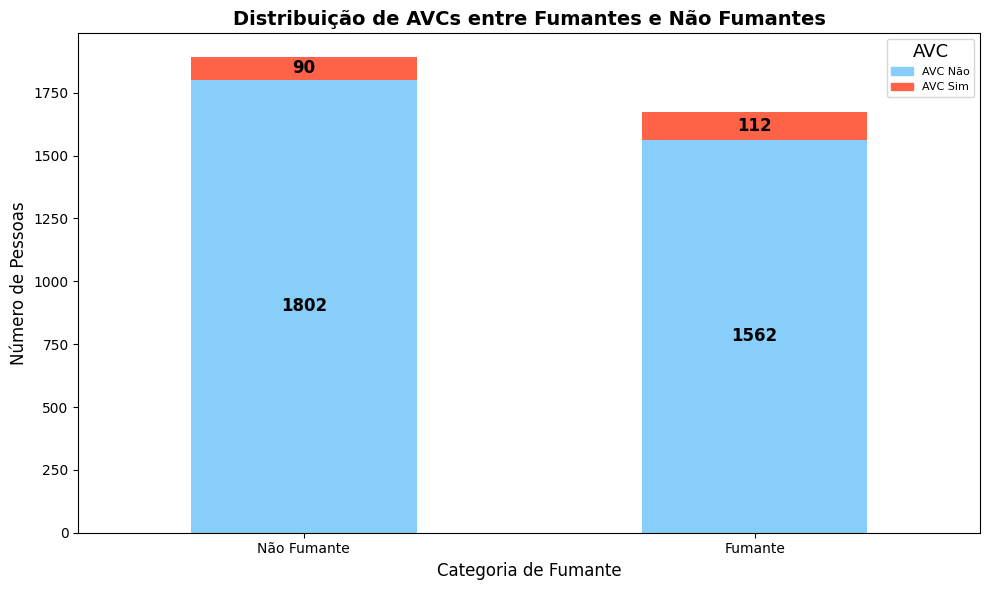

In [17]:
from matplotlib import patches


comparacao.index = ['Não Fumante', 'Fumante']

# Configurar o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(10, 6))
comparacao.plot(kind='bar', stacked=True, color=['#87CEFA', '#FF6347'], ax=ax)

# Adicionar rótulos e título
ax.set_title('Distribuição de AVCs entre Fumantes e Não Fumantes', fontsize=14, fontweight='bold')
ax.set_xlabel('Categoria de Fumante', fontsize=12)
ax.set_ylabel('Número de Pessoas', fontsize=12)
ax.set_xticklabels(['Não Fumante', 'Fumante'], rotation=0, fontsize=10)

# Adicionar rótulos de contagem nas barras
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v:.0f}' for v in container.datavalues], 
                 label_type='center', fontsize=12, color='black', weight='bold')
    
# Ajustar a legenda
ax.legend(title='AVC', title_fontsize='13', fontsize='11')


# Criar handles personalizados
colors = ['#87CEFA', '#FF6347']
labels = ['AVC Não', 'AVC Sim']  # Rótulos correspondentes às cores
handles = [patches.Patch(color=color, label=label) for color, label in zip(colors, labels)]

# Ajustar a legenda
ax.legend(handles=handles, title='AVC', title_fontsize='13', fontsize='8', loc='upper right')

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [18]:
import sqlite3

df = pd.DataFrame(df)

# Criar uma conexão SQLite
conn = sqlite3.connect(':memory:')

# Salvar DataFrame no banco de dados SQLite
df.to_sql('tabela', conn, index=False, if_exists='replace')

# Consultas SQL
query = """
SELECT genero, SUM(fumante) AS total_fumantes
FROM tabela
GROUP BY genero
"""

# Executar consulta
result = pd.read_sql_query(query, conn)
print(result)

# Fechar a conexão
conn.close()

   genero  total_fumantes
0  Female             929
1    Male             744
2   Other               1
